# Introduction

The objectives of this lab are
- Introduction to the MNIST dataset,
- Manipulation of the Python library scikit-learn for machine learning,
- First examples of supervised classification with the k-nearest neighbors method (k-NN) [Lecture 1],
- Evaluation of the classification error,
- Selection of models.

Scikit-learn is a Python software requiring the installation of the libraries NumPy and SciPy (for scientific computation), in compatible versions.
- From scratch, the easiest is to install a complete Python distribution, e.g. Anaconda3 with a new environment, which includes most of the usual Python libraries. The official website of scikit-learn is: http://scikit-learn.org/stable/index.html.
- On the machines at INSA, the Python environment should already include most libraries. In the case of a missing library, you can add it with pip: e.g. **pip install numpy**. We advice to use an IDE, e.g. Visual Studio, to edit the jupyter-notebook.
- Alternatively, you can directly run your code on Google Colab, which allows to access your work from anywhere. Beware, the computation and memory resources are limited.

# 1. The dataset

### scikit-learn datasets
Some datasets are natively available in scikit-learn: https://scikit-learn.org/stable/datasets/real_world.html. It is also possible to generate artificial data or get external data (see unsupervised learning lab).

The datasets include a certain number of attributes (all attributes are not included in all datasets): in particular .data, .target, .target_names, .feature_names, .DESCR:
- .data: table of dimensions n x m where n is the number of samples, and m the number of features.
- .target: the classes (labels) of each instance (in the case of supervised learning).
- .target_names: names of the classes.
- .feature_names: names of the features.
- .DESCR: complete description of the dataset in textual format.

### MNIST
MNIST was developed by the pionners of deep learning, Y. LeCun et Y. Bengio, in 1998. The MNIST database, for Modified or Mixed National Institute of Standards and
Technology, is a database of manually written numbers from 0 to 9. By definition, it is a multi-class classification problem with 10 classes. An input sample is an image of fixed size 28 x 28. For example:

<img src="https://collonvillethomas.files.wordpress.com/2021/04/image-6.png?w=569" alt="MNIST example" />

Thus an example is a vector with 28*28=784 components corresponding to the grayscale of each of the 784 pixels.

## Exercice 1: Manipulation of the database

0. Importing the dataset

In [ ]:
!pip install --upgrade scikit-learn --force

  Using cached scikit_learn-1.3.2-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
  Using cached numpy-1.26.3-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached scipy-1.11.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
  Using cached joblib-1.3.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.2.0-py3-none-any.whl.metadata (10.0 kB)
Using cached scikit_learn-1.3.2-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (10.8 MB)
Using cached joblib-1.3.2-py3-none-any.whl (302 kB)
Using cached numpy-1.26.3-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.0 MB)
Using cached scipy-1.11.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (35.8 MB)
Using cached threadpoolctl-3.2.0-py3-none-any.whl (15 kB)
  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 3.2.0
    Uninstalling threadpoolctl-3.2.0:
      Successfully

In [6]:
# Option 1:

import numpy as np
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

# ## Option 2:
# from sklearn.datasets import fetch_mldata
# mnist = fetch_mldata('MNIST original')

# ## Option 3:
# ## Directly fetch mnist.mat on the internet, for example: https://github.com/daniel-e/mnist_octave/raw/master/mnist.mat

/home/killian/anaconda3/envs/sklearn/lib/python3.12/site-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


python setup.py build_ext --inplace1. Execute the following commands and understand what they do (you will have to use them again).

In [7]:
# Visualize content of mnist dataset
print(mnist)
print (mnist.data)
print (mnist.target)
len(mnist.data)
help(len)
print (mnist.data.shape)
print (mnist.target.shape)

# Convert to numpy array
X=np.asarray(mnist.data)
print(X[0])
print(X[0][1])
print(X[:,1])
print(X[:100])
y=np.asarray(mnist.target)
print(y[0])

{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
69995     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69996     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69997     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69998     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69999     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

       pixel10  ..

2. Visualise the data

scikit-learn includes the library matplotlib which propose numerous primitives to generate curves and graphics. The database MNIST contains written numbers as images with a fixed size 28 x 28. Execute the following commands and understand them.

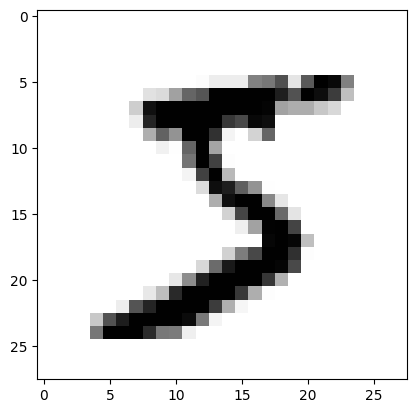

In [10]:
from sklearn import datasets
import matplotlib.pyplot as plt
images = X.reshape((-1, 28, 28))
plt.imshow(images[0],cmap=plt.cm.gray_r,interpolation="nearest")
plt.show()

Affichez la classe correspondante à l’image affichée.

In [ ]:
# TODO

3. Explore other datasets

scikit-learn includes the library matplotlib which propose numerous primitives to generate curves and graphics. The database MNIST contains written numbers as images with a fixed size 28 x 28. Execute the following commands and understand them.

In [ ]:
# TODO

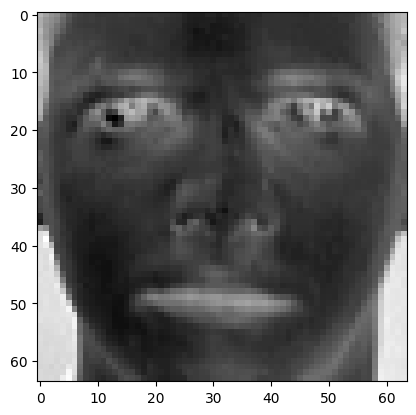

0


In [11]:
# SOLUTION
import numpy as np
from sklearn.datasets import fetch_olivetti_faces
olivetti = fetch_olivetti_faces()

X_olivetti=np.asarray(olivetti.data)
images_olivetti = X_olivetti.reshape((-1, 64, 64))
plt.imshow(images_olivetti[0],cmap=plt.cm.gray_r,interpolation="nearest")
plt.show()
print(olivetti.target[0])

# 2. The k-Nearest Neighbors (k-NN) method

The k-NN method is a very intuitive algorithm, which can be parametrized and often has a good performance on clasification problems.

The k-NN method requires:
- an integer k
- a training dataset
- a proximity/similarity/distance measure

The principle of the algorithm is the following:
For a new unlabelled example x, find the k labelled samples from the training dataset which are the closest with respect to the chosen measure (the neighbors). The class associated to x is then the one appearing most often among the neighbors (majority/consensus).

In the following example, we have 3 classes (ω1, ω2, ω3) and the goal is to find the value of the class for an unknown example x. We consider the Euclidian distance as proximity measure and k=5 neighbors.

<img src="https://miro.medium.com/v2/resize:fit:488/1*9h-WczF6csbeut5vsvjSUA.gif" alt="k-NN example" />

Among the 5 nearest neighbors, 4 belong to ω1 and 1 belongs to ω3, so x is affected to ω1, the class of the majority.

### Information:
We use the library sklearn.neighbors to execute an example of this classification algorithm.

The command **train_test_split**, implemented in **model_selection** in **sklearn** allows to divide the dataset in two: one training set and one test set:
xtrain, xtest, ytrain, ytest = train_test_split(data, target, train_size=pourcentage_de_données)

Exemple percentage of data = 0.7 (70%)

The algorithm k-NN is implemented in a package called **neighbors**.
Here are the main commands:
- The line **clf = neighbors.KNeighborsClassifier(n_neighbors)** creates an object of type classifier based on the n_neighbors closest neighbors,
- The instruction clf.fit(X, y) uses the data to define the classifier (training),
- The command **clf.predict()** is used to classify the new examples,
- The command **clf.predict_proba()** allows to estimate the probability of the proposed classification,
- The command **clf.score(xtest, ytest)** computes the global score of the classifier for a given dataset.

## Exercice 2: The method of the k-NN

- Import the dataset

In [12]:
import numpy as np
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

X_complete=np.asarray(mnist.data)
y_complete=np.asarray(mnist.target)

/home/killian/anaconda3/envs/sklearn/lib/python3.12/site-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


- Extract a data sample named X with a size of 5000 examples using the function **np.random.randint(70000, size=5000)**, with the corresponding labels y.

In [13]:
# TODO
indices = np.array(np.random.randint(70000, size=5000))
X = X_complete[indices]
Y = y_complete[indices]

- Divide the database in 80% for training and 20% for test.

In [14]:
from sklearn.model_selection import train_test_split

# TODO

#X_training = X[0:4000]
#X_test = X[4001:5000]

#y_training = Y[0:4000]
#y_test = Y[4001:5000]

# Autre façon plus propre de le faire :)
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, train_size=0.8)

- Train a k-NN classifier with k = 10 on the training set.

In [15]:
from sklearn import neighbors

# TODO

clf = neighbors.KNeighborsClassifier(10)
clf.fit(xtrain, ytrain)
clf.predict(xtest)

Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7fbe99ab7c40>
Traceback (most recent call last):
  File "/home/killian/anaconda3/envs/sklearn/lib/python3.12/site-packages/threadpoolctl.py", line 847, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/home/killian/anaconda3/envs/sklearn/lib/python3.12/site-packages/threadpoolctl.py", line 984, in _make_controller_from_path
    lib_controller = controller_class(filepath=filepath, prefix=prefix)
                     ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/killian/anaconda3/envs/sklearn/lib/python3.12/site-packages/threadpoolctl.py", line 111, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/killian/anaconda3/envs/sklearn/lib/python3.12/ctypes/__init__.py", line 379, in __init__
   

array(['2', '0', '1', '6', '2', '2', '8', '3', '1', '9', '5', '6', '5',
       '0', '6', '2', '1', '4', '3', '0', '4', '9', '0', '2', '7', '1',
       '3', '6', '0', '0', '3', '0', '4', '6', '1', '4', '3', '1', '9',
       '2', '5', '8', '2', '2', '6', '1', '7', '1', '2', '8', '4', '8',
       '4', '2', '4', '3', '9', '5', '4', '1', '8', '5', '5', '0', '5',
       '9', '4', '2', '5', '3', '1', '1', '7', '1', '9', '5', '5', '7',
       '9', '4', '7', '7', '0', '6', '3', '3', '9', '6', '5', '8', '8',
       '6', '9', '6', '4', '2', '3', '2', '7', '6', '7', '7', '7', '6',
       '7', '9', '5', '4', '6', '3', '3', '3', '1', '9', '6', '7', '2',
       '1', '2', '9', '4', '5', '9', '1', '5', '0', '9', '4', '7', '1',
       '8', '3', '5', '0', '1', '0', '3', '1', '8', '9', '6', '1', '0',
       '9', '9', '2', '3', '8', '1', '6', '3', '3', '0', '2', '3', '4',
       '9', '0', '8', '2', '5', '2', '8', '7', '4', '6', '1', '0', '6',
       '5', '6', '7', '8', '8', '3', '4', '1', '0', '3', '7', '2

- Display image 4, the class of image 4 and its predicted class

(5000, 784)


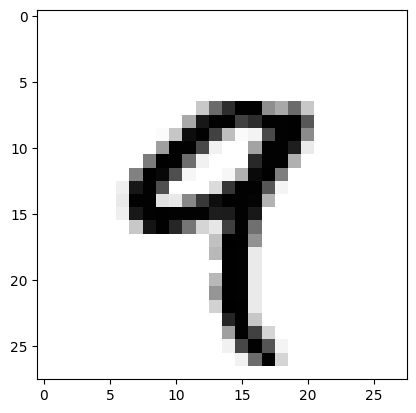

array([[0. , 0. , 0. , 0. , 0.3, 0. , 0. , 0. , 0. , 0.7]])

In [16]:
# TODO

print(X.shape)

images = X_complete.reshape((-1, 28, 28))
plt.imshow(images[4],cmap=plt.cm.gray_r,interpolation="nearest")
plt.show()

clf.predict([X_complete[4]])
clf.predict_proba([X_complete[4]])

- Display the score on the test set

In [17]:
# TODO

success_score = clf.score(xtest, ytest)
print(success_score)

0.914


- What is the error rate for the training set ? Is it normal ? Underfitting/Overfitting ?

In [18]:
# TODO

error_rate = 1 - success_score
print(error_rate)

0.08599999999999997


- Vary the percentage of samples (training and test) and display the score. What is the remarkable percentage ?

In [19]:
# TODO

- Vary the number of neighbors (k) from 2 to 15 and display the scores as a curve (one curve for training and one for test). What is the optimal k ? Implement two approaches:
    - use a loop on k using the training and test datasets,
    - use a K-fold validation as implemented with the functions **kf = KFold(len(X), n_folds=10, shuffle=True, random_state=42)** and **kf.split(X)** from sklearn.model_selection. Let's remind that the score for a particular model (one choice of k) is obtained as the average score over all folds.

In [22]:
from sklearn.model_selection import KFold
import numpy as np

# TODO
## Use a loop
k_list = np.arange(2, 16, 1)
scores_train = list()
scores_train_2 = list()

xtrain, xtest, ytrain, ytest = train_test_split(X, Y, train_size=0.8)


for k in k_list:
    clf = neighbors.KNeighborsClassifier(k)
    clf.fit(xtrain, ytrain)
    scores_train.append(clf.score(xtest, ytest))

kf = KFold(n_splits=10, shuffle=True, random_state=42)


# Tracer le résultat avec Matplotlib
plt.plot(scores_train_2, marker='o')
plt.title("Scores d'entraînement pour chaque pli")
plt.xlabel("Plis")
plt.ylabel("Score d'entraînement")
plt.show()


# Display scores
plt.plot(k_list, scores_train)
plt.show()
# plt.xlabel("k")
# plt.ylabel("Score")
# plt.show()

ValueError: multiclass-multioutput is not supported

- Still using K-fold, vary the type of distance used. What is the best distance in our case ?

In [ ]:
# TODO

- Fixez n_job à 1 puis à -1 et calculez le temps de chacun.

In [ ]:
#TODO

- In your opinion, what are the advantages and disadvantages of the k-NN method: optimality ? computation time ? scalability ?

# 3. The Support Vector Machines (SVM) method

The SVM is a method finding a linear separation between 2 classes of samples in an augmented space using kernel functions, while optimizing the margin between the 2 classes. This method can have a good performance on clasification problems.

The SVM method requires:
- a kernel (e.g. Gaussian)
- a training dataset

The SVM method is designed for binary classification and it is possible to perform multi-class classification by using several "one-vs-rest" binary classification. The Support Vector Classification method automatically perform this multi-class approach.

In the following example, we have 3 classes (ω1, ω2, ω3) and the goal is to find the value of the class for an unknown example x. We consider several Kernels

<img src="https://scikit-learn.org/stable/_images/sphx_glr_plot_iris_svc_001.png" alt="SVM" />

The results are highly dependent on the choice of this kernel.

### Information:
The algorithm SVC is implemented in a package called **sklearn.svm**: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC.

In order for the SVM method to perform well, the data needs to be centered. This can be performed using the **StandardScaler** function in the package sklearn.preprocessing. The main commands are then:
- scaler = StandardScaler()
- X_train = scaler.fit_transform(X_train)
- X_test = scaler.transform(X_test)

Then to get the SVC classifier, here are the main commands:
- The line **clf = SVC(kernel='rbf', decision_function_shape='ovr')** creates an object of type classifier based on the Gaussian kernel,
- The instruction clf.fit(X, y) uses the data to define the classifier (training),
- The command **clf.predict()** is used to classify the new examples,
- The command **clf.score(xtest, ytest)** computes the global score of the classifier for a given dataset.

## Exercice 3: The SVC method

- Just like before: import the data and extract a data sample named X with a size of 5000 examples.

In [ ]:
# TODO

- Inspired by the previous work on the k-NN: use K-fold validation in order to decide which kernel gives the best results for our classification problem using an SVC classifier. Do not forget to scale the data.

In [ ]:
# TODO

- In your opinion, what are the advantages and disadvantages of the SVM method: optimality ? computation time ? scalability ?

### Complementary definitions from the medical domain:
We define:
- TP (true positives) represents the number of ill individuals with a positive test,
- FP (faux positives) represents the number of healthy individuals with a positive test,
- TP (true negatives) represents the number of ill individuals with a negative test,
- FP (faux negatives) represents the number of healthy individuals with a negative test.

Two measures allow to judge the quality of a classifier:
1. **Sensitivity** (or *true positive rate, recall, probability of detection*): probability that the test is positive when the illness is present = proportion of positives correctly identified = TP/(TP+FN).
2. **Specificity** (or *true negative rate*): probability that the test is negative when the patient is healthy = proportion of negatives correctly identified = TN/(VP+FN).